# California Housing Prices

## 1. Looking Around

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
# Function to read data from the csv file
def load_data():
    return pd.read_csv('housing.csv')

In [31]:
# Input data into df
df = load_data()

In [32]:
# Quick look at the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
# Description of the dataset - Number of non-null values and data type of each attribute.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
# A look at the 'ocean_proximity' attribute, since contain 'object' data. Want to determine if it is categorical.
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [35]:
# Summary of attributes that have numerical values
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


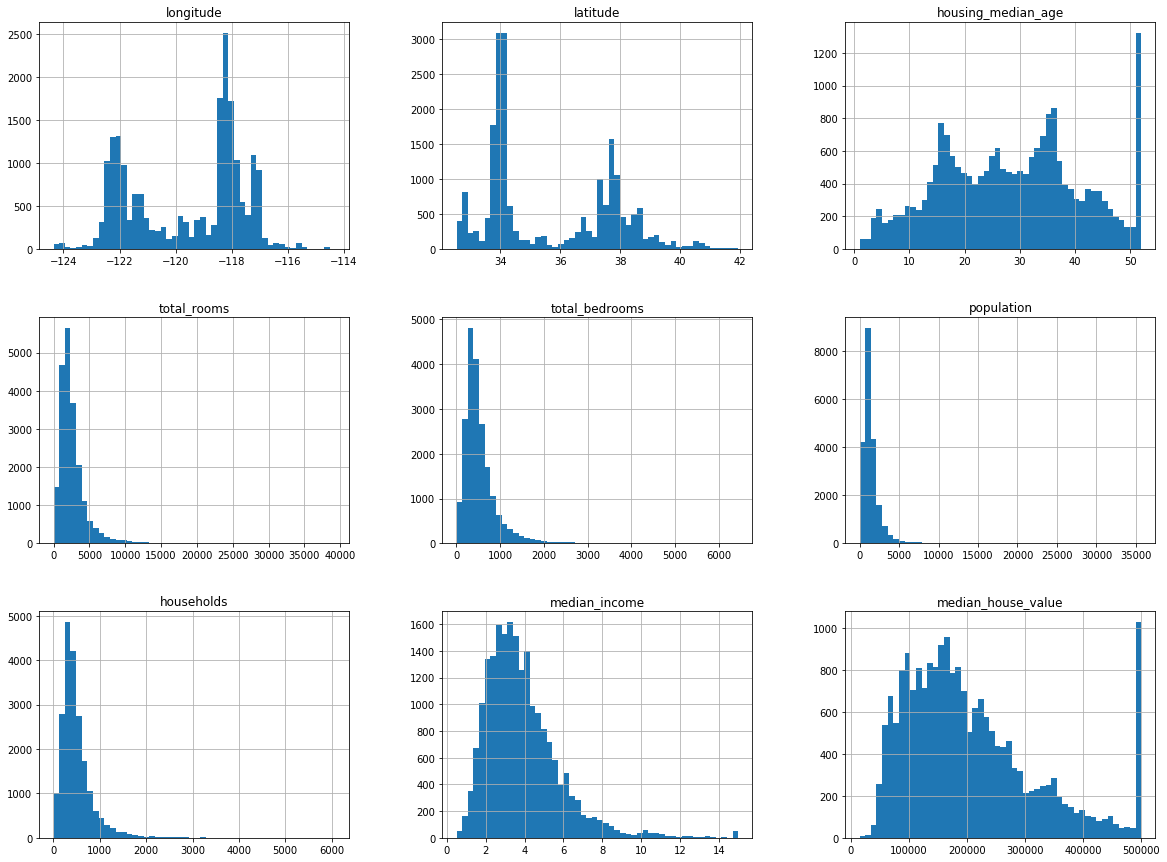

In [36]:
# Plotting numerical attributes
df.hist(bins = 50, figsize=(20, 15))
plt.show()

### Important points discovered about the dataset

- `median_income` looks like preprocessed. It is not expressed in USD.
- `housing_median_age` and `median_house_value` looks like they were preprocessed too.
- Some attributes have [heavy-tailed distribution](https://en.wikipedia.org/wiki/Heavy-tailed_distribution).

## 2. Create Train and Test sets  

Datasets will be formed as follows:  
- 80% of the original dataset into Train
- 20% of the original dataset into Test

In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [38]:
train.shape, test.shape

((16512, 10), (4128, 10))

## 3. Visualizing Dataset

In [39]:
# Make a copy of training dataset
train_copy = train.copy()

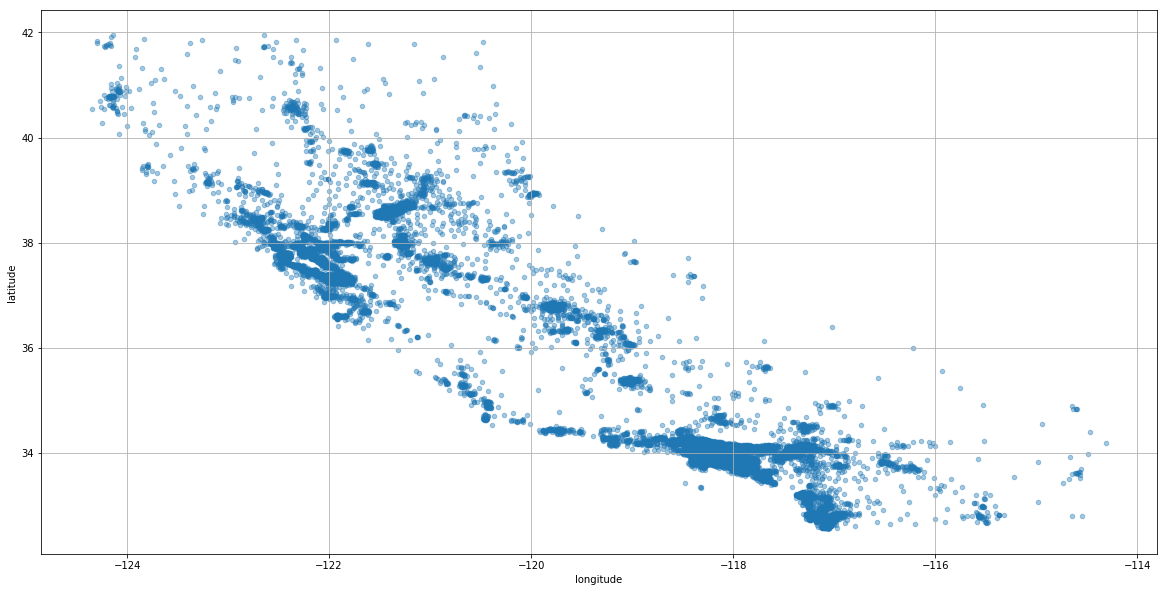

In [40]:
# Creating scatter plot to show geographical information
train_copy.plot(x = "longitude", y = "latitude", kind = "scatter", figsize = (20, 10), grid = True, alpha = 0.4)

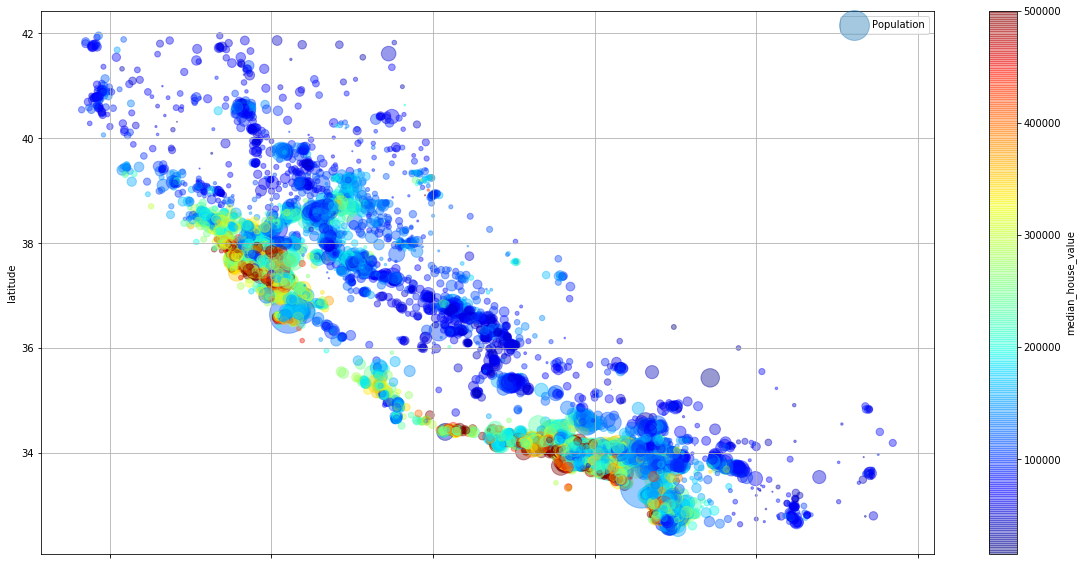

In [41]:
# Colormap to depict both population and housing prices
train_copy.plot(x = "longitude", y = "latitude", kind = "scatter", figsize = (20, 10), grid = True, alpha = 0.4,
               s = train_copy['population']/20, label = "Population", c = "median_house_value", 
                cmap = plt.get_cmap("jet"), colorbar = True)

The radius of a circle represents population in a certain area and color represents median house price in each area. Population has been divided by 20 to prevent circles from becoming bigger and rendering the graph unreadable.

The visualization clearly depicts the correlation between the median house price has going on with ocean proximity and population.

## 4. Correlations  
Computing *Standard Correlation Coefficient* for the dataset.

In [42]:
corr_matrix = train_copy.corr()

In [43]:
# Each attribute's correlation with median house values
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Looks like `median_income` and `total_rooms` have the biggest positive correlation while `longitude` and `latitude` have the biggest negative correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79365137b8>,
      dtype=object)

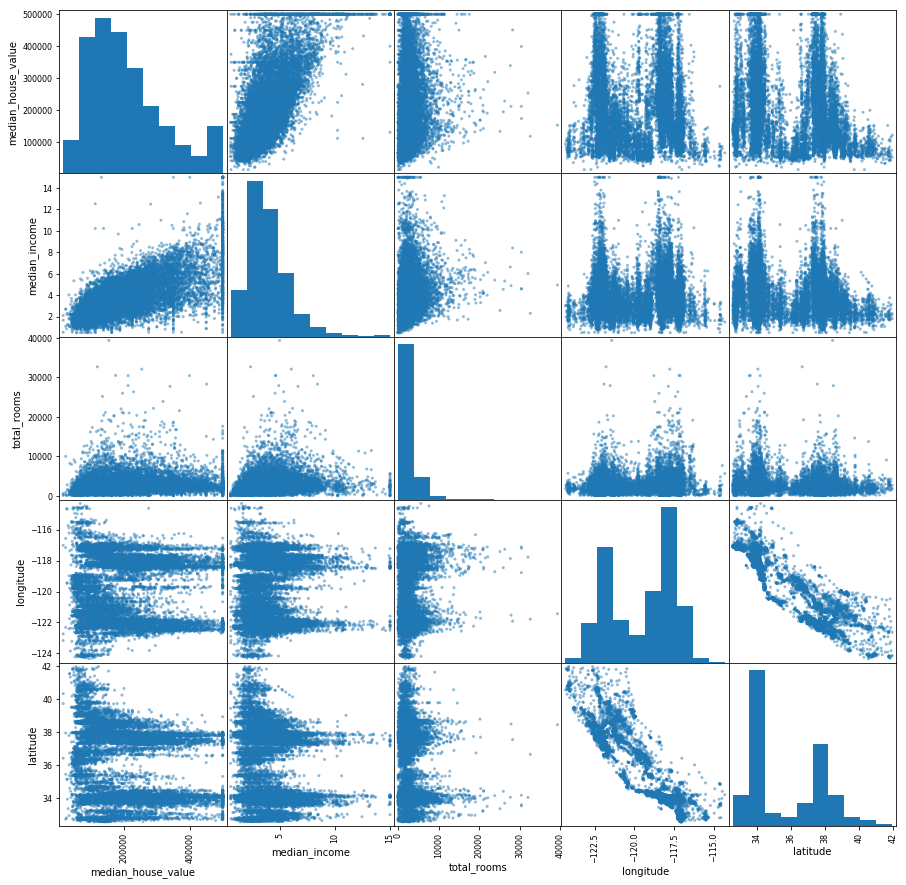

In [44]:
#from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "longitude", "latitude"]
pd.plotting.scatter_matrix(train_copy[attributes], figsize = (15, 15))

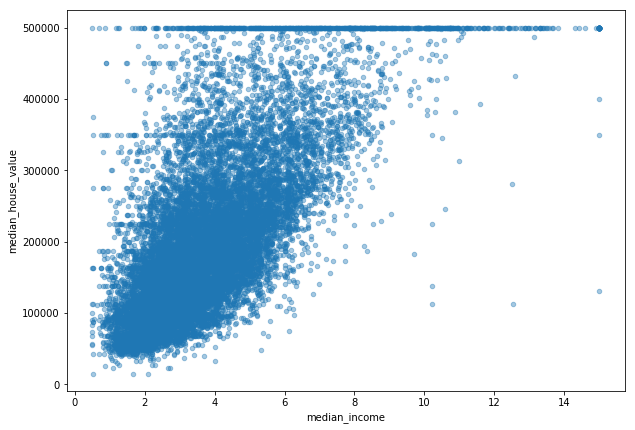

In [45]:
# Closing in on the correaltion between median house value and median income
train_copy.plot(x = "median_income", y = "median_house_value", kind = "scatter", alpha = 0.4, figsize = (10, 7))

## 5. Feature Engineering

In [46]:
# number of rooms per each household
train_copy['rooms_per_household'] = train_copy['total_rooms'] / train_copy['households']

# number of bedrooms per every room
train_copy['bedrooms_per_room'] = train_copy['total_bedrooms'] / train_copy['total_rooms']

# population per household 
train_copy['population_per_household'] = train_copy['population'] / train_copy['households']

In [47]:
# Looking at correlations again
corr_matrix = train_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

## 6. Data Cleaning

In [48]:
# Separate training dataset into features(X) and labels(y)
X_train = train.drop('median_house_value', axis = 1)
y_train = train['median_house_value'].copy()

### 6.1 Missing values  
Note that `total_bedrooms` had about 207 rows of missing data. Dealing with missing data here. Missing data will be filled with the median of each feature using Scikit-learn SimpleImputer.

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [50]:
# Subset numerical features of the training set
X_train_numeric = X_train.drop('ocean_proximity', axis = 1)

In [51]:
# Fit imputer instance to training dataset.
imputer.fit(X_train_numeric)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [52]:
# Transform training set using trained imputer
X = imputer.transform(X_train_numeric)
X_train_tr = pd.DataFrame(X, columns = X_train_numeric.columns)

### 6.2 Categorical values

In [53]:
X_train_cat = X_train[['ocean_proximity']]
X_train_cat

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


`ocean_proximity` is a string categorical feature. These string categories will be converted into numerical values representing each category using Scikit-learn OrdinalEncoder.

In [54]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ocean_proximity_encoded = ordinal_encoder.fit_transform(X_train_cat)
ocean_proximity_encoded

array([[4.],
       [4.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

In [55]:
# Categories of ordinal encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 6.3 Custom Transformer for Feature Engineering  
A transformer to add new features to the dataset, which were done in a previous step, Feature Engineering.

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, get_bedrooms_per_room = True):
        self.get_bedrooms_per_room = get_bedrooms_per_room
    def fit(self, X, y = None):
        return self # No need for fitting. Just a formality.
    def transform(self, X, y = None):
        X_new = X.copy()
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.get_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]

In [57]:
# Test new transformer
feat_eng = FeaturesAdder()
new_df = feat_eng.transform(train.values)
new_df

array([[-117.03, 32.71, 33.0, ..., 5.017656500802568, 3.691813804173355,
        0.20057581573896352],
       [-118.16, 33.77, 49.0, ..., 4.473544973544974, 1.7380952380952381,
        0.23270254287403902],
       [-120.48, 34.66, 4.0, ..., 5.645833333333333, 2.7232142857142856,
        0.17448603057459147],
       ...,
       [-118.38, 34.03, 36.0, ..., 3.9867172675521823, 3.332068311195446,
        0.27082341742027605],
       [-121.96, 37.58, 15.0, ..., 6.395348837209302, 3.178890876565295,
        0.16699300699300698],
       [-122.42, 37.77, 52.0, ..., 3.4025764895330113, 2.108695652173913,
        0.31116895409370565]], dtype=object)

### 6.4 Feature Scaling  
A standard scaler will be used.

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_numeric)

## 7. Pipelines

In [59]:
# Pipeline to convert numerical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('feature_eng', FeaturesAdder()),
    ('std_scaler', StandardScaler())
])

X_train_numeric_tr = numerical_pipeline.fit_transform(X_train_numeric)

In [60]:
# Pipeline to prepare all data: both numerical and categorical
from sklearn.compose import ColumnTransformer

num_attributes = list(X_train_numeric)
cat_attributes = ["ocean_proximity"]

complete_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, num_attributes),
    ("categorical", OrdinalEncoder(), cat_attributes),
])

X_train_prepd = complete_pipeline.fit_transform(X_train)

## 8. Training Models

### 8.1 Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train_prepd, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
# Evaluating the model
from sklearn.metrics import mean_squared_error

lin_preds = linear_regression.predict(X_train_prepd)
lin_mse = mean_squared_error(y_train, lin_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68310.33842917712

### 8.2 Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train_prepd, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [64]:
# Evaluating model

dec_preds = dec_tree.predict(X_train_prepd)
dec_mse = mean_squared_error(y_train, dec_preds)
dec_rmse = np.sqrt(dec_mse)
dec_rmse

0.0

Looks like the model is overfitting.

In [65]:
# Cross-validation score
from sklearn.model_selection import cross_val_score

cross_scores = cross_val_score(dec_tree, X_train_prepd, y_train, scoring = "neg_mean_squared_error", cv = 10)
dec_cross_scores_rmse = np.sqrt(-cross_scores)

In [66]:
print('Scores: {}\n Mean: {}\n STD: {}'.format(dec_cross_scores_rmse, dec_cross_scores_rmse.mean(), dec_cross_scores_rmse.std()))

Scores: [73060.25121133 73933.80095336 68159.69984903 72531.60692463
 74364.14258906 70039.30351934 71579.29444082 70582.10915353
 69213.48381653 72422.0970261 ]
 Mean: 71588.5789483726
 STD: 1943.329718392276


### 8.3 Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_prepd, y_train)

/home/batman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
# Cross-validation score
rf_cross = cross_val_score(rf_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error", cv = 10)
rf_cross_rmse = np.sqrt(-rf_cross)

In [69]:
print('Scores: {}\n Mean: {}\n STD: {}'.format(rf_cross_rmse, rf_cross_rmse.mean(), rf_cross_rmse.std()))

Scores: [51472.63279208 52653.21377202 52143.43004431 55077.45376019
 56096.72550607 51534.58287804 50665.44933655 52634.54766431
 52944.14183119 53078.32930077]
 Mean: 52830.050688552554
 STD: 1566.6494129646444


In [70]:
# Saving the model
from sklearn.externals import joblib

joblib.dump(rf_reg, "random_forest.pkl")

['random_forest.pkl']

## 9. Tuning Models

In [71]:
from sklearn.model_selection import GridSearchCV

params = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
         {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
         ]

rf_regressor = RandomForestRegressor()

grid_search = GridSearchCV(rf_regressor, params, cv = 5, scoring = 'neg_mean_squared_error', 
                           return_train_score = True)

grid_search.fit(X_train_prepd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [72]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [73]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [74]:
# Score
grid_search.cv_results_

{'mean_fit_time': array([0.08431644, 0.21588306, 0.58585815, 0.11020575, 0.37314019,
        1.09450312, 0.14932122, 0.4982769 , 1.64446626, 0.29114871,
        0.76722274, 2.29123611, 0.12548223, 0.40334444, 0.1791676 ,
        0.54115825, 0.19547062, 0.69374676]),
 'std_fit_time': array([0.00906954, 0.02827856, 0.01717394, 0.00319072, 0.04011635,
        0.05322482, 0.00434094, 0.01478318, 0.1090552 , 0.04123259,
        0.03572798, 0.02354384, 0.0073773 , 0.03415497, 0.00695684,
        0.030652  , 0.004095  , 0.0310184 ]),
 'mean_score_time': array([0.00608473, 0.01031766, 0.02467966, 0.00358849, 0.01049719,
        0.02438684, 0.00295773, 0.00893984, 0.0279285 , 0.00455775,
        0.00996099, 0.02834086, 0.00450258, 0.01221762, 0.00409341,
        0.01141229, 0.00381169, 0.01139483]),
 'std_score_time': array([1.62675425e-03, 2.41935283e-03, 2.93572907e-03, 1.37936054e-03,
        2.73674102e-03, 2.02279597e-03, 3.57632955e-05, 1.02376679e-03,
        2.46736673e-03, 9.60710954e-

In [75]:
# Feature importances
grid_search.best_estimator_.feature_importances_

array([0.09930242, 0.09882024, 0.04480062, 0.01773228, 0.01786059,
       0.01939872, 0.01716632, 0.3094805 , 0.07571179, 0.11565043,
       0.10508138, 0.07899471])

## 9. Evaluating Model on the Test Set

In [76]:
final_model = grid_search.best_estimator_

In [79]:
X_test = test.drop('median_house_value', axis = 1)
y_test = test['median_house_value'].copy()

X_test_prepd = complete_pipeline.transform(X_test)

In [80]:
test_predictions = final_model.predict(X_test_prepd)

In [81]:
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

48955.64994132904